<a href="https://colab.research.google.com/github/juliabulia245/ACC_Python_Class/blob/master/What's_up%2C_Dog%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
Throughout the years, I've known many dogs with many different names: Dixie, Dottie, Edgar Allan Pug, Harper, Kaya, Lennie, Luna, Muffen... in fact, I can only think of two dogs I've met with the same name — Cooper.

When I started my current job, I became responsible for issuing dog licenses in the City of Troy. I was surprised to find that the most popular dog names were ones I'd never heard before: Bella, Jax, Charlie... I decided to explore dog name popularity to explore changes over time.

# **Section 0**: Imports & Settings
This section imports Python libraries used in this project and sets options and variables used throughout the project.

In [ ]:
import pandas as pd
import numpy as np

pd.set_option("display.max_rows", 1000, "display.max_columns", None)

# dogs per x (if helpful later on)
per = 1000

# **Section 1**: Importing Data

This section imports all the data into data frames and cleans it up!
The data I used is from the following places:


*   Anchorage, AK
*   Cambridge, MA
*   New York, NY
*   Troy, NY
*   Allegheny County, PA
*   Seattle, WA

**1.0 - Functions**

In [ ]:
def cleanup(df,locality):
  #set column names so they will match for each locality
  df.columns = ['name','breed','year']

  #set locality values
  df['locality'] = locality

  #convert all names to uppercase
  df['name'] = df['name'].str.upper()

  #remove null, N/A, etc. values
  df = df.replace(r'^\s*$', np.nan, regex=True)
  df = df.replace(r'UNKNOWN', np.nan, regex=True)
  df = df.replace(r'NAME NOT PROVIDED', np.nan, regex=True)
  df = df.dropna()
  return df

**1.1 - Anchorage, AK**

**Source:** https://data.muni.org/Other/Dog-Names/a9a7-y93v
<br />
**Description:** *Names and count of currently active dog registrations per name at a given point in time*

> **Columns used:**
>*   name
>*   count
>
> **Dates:**
>*   Oct. 18, 2017 (snapshot)
>*   May 16, 2018 (snapshot)
>*   August 13, 2020 (current, last known update as of Sep. 7, 2020)

In [ ]:
a_cols = ['name','count']

a_now = pd.read_csv('https://data.muni.org/resource/a9a7-y93v.csv?$limit=500000',header=0,names=a_cols)
a_2017 = pd.read_csv('https://raw.githubusercontent.com/juliabulia245/ACC_Python_Class/master/anchorage_2017-10-18.csv',header=0,names=a_cols)
a_2018 = pd.read_csv('https://raw.githubusercontent.com/juliabulia245/ACC_Python_Class/master/anchorage_2018-05-16.csv',header=0,names=a_cols)

a_now['year'] = 2020
a_2017['year'] = 2017
a_2018['year'] = 2018

anchorage = pd.concat([a_now, a_2017, a_2018])
anchorage['locality'] = "Anchorage, AK"
#anchorage

**1.2 - Cambridge, MA**

**Source:** https://data.cambridgema.gov/General-Government/Dogs-of-Cambridge/sckh-3xyx
<br />
**Description:** *Currently active dog registrations at a given point in time*
>
>**Columns used:**
>* name
>* breed
>
>**Dates:**
>* *Oct. 2, 2017 (snapshot - unused)*
>* Nov. 6, 2017 (snapshot)
>* Jan. 22, 2018 (current, last known update as of Sep. 7, 2020)

In [ ]:
c_now = pd.read_csv('https://data.cambridgema.gov/resource/sckh-3xyx.csv?$limit=500000',usecols=['dog_name','dog_breed'])
c_2017 = pd.read_csv('https://raw.githubusercontent.com/juliabulia245/ACC_Python_Class/master/cambridge_2017-11-06.csv',usecols=['Dog_Name','Dog_Breed'])

c_now.columns = ['name','breed']
c_2017.columns = ['name','breed']

c_now['year'] = '2018'
c_2017['year'] = '2017'

cambridge_rows = pd.concat([c_now, c_2017])

cambridge_rows = cleanup(cambridge_rows, "Cambridge, MA")
#cambridge_rows

**1.3 - New York, NY**

**Source:** https://data.cityofnewyork.us/resource/nu7n-tubp
<br />
**Description:** *Dog licenses issued between Sep. 12, 2014 and Dec. 31, 2018 (data last updated July 25, 2019)*
<br />
>**Columns used:**
>* animalname
>* breedname
>* licenseissuedate
>
>
**Notes:**
*This dataset contained an "extract year" column, which revealed duplicates in the dataset upon examination (the same license was often extracted more than once), so I removed duplicates with .drop_duplicates() by using all columns (except "extract_year", not imported) as the subset, yielding 87,743 duplicates. Next, I dropped the columns I didn't need for the project.*

In [ ]:
nyc_rows = pd.read_csv('https://data.cityofnewyork.us/resource/nu7n-tubp.csv?$limit=500000',usecols=['animalname','animalgender','animalbirth','breedname','zipcode','licenseissueddate','licenseexpireddate'],na_filter=False)
nyc_rows = nyc_rows.drop_duplicates()
nyc_rows['year'] = pd.DatetimeIndex(nyc_rows['licenseissueddate']).year
nyc_rows = nyc_rows.drop(columns=['animalgender','animalbirth','zipcode','licenseissueddate','licenseexpireddate'])

nyc_rows = cleanup(nyc_rows, "New York, NY")
#nyc_rows

**1.4 - Troy, NY**

**Source:** https://github.com/juliabulia245/ACC_Python_Class/blob/master/troy.csv
<br />
**Description:** *Licenses issued between Oct. 1, 1999 and Sep. 4, 2020 (retrieved Sep. 4, 2020 via FOIL request)*
<br />
>**Columns used:**
>* Name
>* Breed
>* Transaction

**Notes:** *This particular dataset only contains one record per dog. The transaction column is the earliest license transaction date. One improvement I'd like to make is to import individual license records so I can more accurately analyze popularity over time.*


In [ ]:
troy_rows = pd.read_csv('https://raw.githubusercontent.com/juliabulia245/ACC_Python_Class/master/troy.csv',usecols=['Name','Breed','Transaction'],na_filter=False)
troy_rows['year'] = pd.DatetimeIndex(troy_rows['Transaction']).year
troy_rows = troy_rows.drop(columns=['Transaction'])

troy_rows = cleanup(troy_rows, "Troy, NY")
#troy_rows

**1.5 - Allegheny County, PA**

**Source:** https://data.wprdc.org/dataset/allegheny-county-dog-licenses
<br />
**Description:** *Licenses issued between 2007-2018*
<br />
>**Columns used:**
>* Breed
>* DogName
>* ValidDate

**Notes:** *These datasets take much longer than the others to load. I performed some searches for information about CKAN HTTP requests, because I sense it may be faster to add parameters to the URL to request specific columns to download, as opposed to using the usecols= parameter in python... to be continued!*

In [ ]:
palife = pd.read_csv('https://data.wprdc.org/datastore/dump/f8ab32f7-44c7-43ca-98bf-c1b444724598',usecols=['Breed','DogName','ValidDate'])
pa2020 = pd.read_csv('https://data.wprdc.org/datastore/dump/75e867fe-3154-4be8-a7f3-5909653e5c06',usecols=['Breed','DogName','ValidDate'])
pa2019 = pd.read_csv('https://data.wprdc.org/datastore/dump/37b11f07-361f-442a-966e-fbdc5eef0840',usecols=['Breed','DogName','ValidDate'])
pa2018 = pd.read_csv('https://data.wprdc.org/datastore/dump/53211313-01c9-46e2-b520-a5748a10fd7c',usecols=['Breed','DogName','ValidDate'])
pa2017 = pd.read_csv('https://data.wprdc.org/datastore/dump/ca0c8ba9-205c-4f5f-a1be-b87245046ad0',usecols=['Breed','DogName','ValidDate'])
pa2016 = pd.read_csv('https://data.wprdc.org/datastore/dump/c88d57d4-cb43-4257-a3f1-ca46f0c837de',usecols=['Breed','DogName','ValidDate'])
pa2015 = pd.read_csv('https://data.wprdc.org/datastore/dump/4d49202b-8bac-4cf9-9915-798a342253a6',usecols=['Breed','DogName','ValidDate'])
pa2014 = pd.read_csv('https://data.wprdc.org/datastore/dump/19e5756c-a964-4ac3-abb5-ab1f7a1f9bd6',usecols=['Breed','DogName','ValidDate'])
pa2013 = pd.read_csv('https://data.wprdc.org/datastore/dump/9ad226b2-4231-4158-bf71-043be226e3d9',usecols=['Breed','DogName','ValidDate'])
pa2012 = pd.read_csv('https://data.wprdc.org/datastore/dump/891ee2e8-411a-433c-80a3-885b13008d66',usecols=['Breed','DogName','ValidDate'])
pa2011 = pd.read_csv('https://data.wprdc.org/datastore/dump/a0b2bd41-cee9-4501-92b9-4cd55ed61ee6',usecols=['Breed','DogName','ValidDate'])
pa2010 = pd.read_csv('https://data.wprdc.org/datastore/dump/174fc1be-68a6-4b6a-96d9-e5ef540b8e95',usecols=['Breed','DogName','ValidDate'])
pa2009 = pd.read_csv('https://data.wprdc.org/datastore/dump/5a019e45-e2cb-4f48-8934-1988923239d2',usecols=['Breed','DogName','ValidDate'])
pa2008 = pd.read_csv('https://data.wprdc.org/datastore/dump/82040517-c2c1-41d9-a810-73b15603cd9a',usecols=['Breed','DogName','ValidDate'])
pa2007 = pd.read_csv('https://data.wprdc.org/datastore/dump/2623112a-bc79-4318-b816-ebb1d576da9c',usecols=['breed','dog_name','valid_date'])
pa2007.columns = ['Breed','DogName','ValidDate']

allegheny_rows = pd.concat([palife,pa2020,pa2019,pa2018,pa2017,pa2016,pa2015,pa2014,pa2013,pa2012,pa2011,pa2010,pa2009,pa2008,pa2007])
allegheny_rows = allegheny_rows.drop_duplicates()
allegheny_rows['year'] = pd.DatetimeIndex(allegheny_rows['ValidDate']).year

allegheny_rows = allegheny_rows[['DogName','Breed','year']]

allegheny_rows = cleanup(allegheny_rows,"Allegheny Co, PA")
#allegheny_rows

**1.6 - Seattle, WA**

**Source:** https://data.seattle.gov/Community/Seattle-Pet-Licenses/jguv-t9rb
<br />
**Description:** *Pet licenses issued between Jan. 3, 2000 and Jan. 2, 2020 (last updated Jan. 2, 2020)*
<br />
>**Columns used:**
>* name
>* breed
>* date_issued
>
>**Dates:**
>* Apr. 18, 2018 (snapshot - unused)
>* Jul. 12, 2018 (snapshot - unused)
>* Jan. 2, 2020 (current, last known update as of Sep. 7, 2020)
>
**Notes:**
*This dataset also contained licenses for cats, goats, pigs, etc., so I added an SoQL query to the URL to filter for species=Dog (after confirming with .value_counts() that Dogs were not listed any other way, e.g. DOG or dog). I also combined the primary and secondary breed columns with SoQL (although I didn't end up using these in my analysis).*

In [ ]:
seattle_rows = pd.read_csv('https://data.seattle.gov/resource/jguv-t9rb.csv?species=Dog&$select=animal_s_name,primary_breed%20||%20",%20"%20||%20secondary_breed%20AS%20breed,license_issue_date%20AS%20year&$limit=500000',na_filter=False)

seattle_rows['year'] = pd.DatetimeIndex(seattle_rows['year']).year

cleanup(seattle_rows, "Seattle, WA")
#seattle_rows

,name,breed,year,locality
1,LEONO,"Retriever, Golden, Mix",2015,"Seattle, WA"
3,SMOKE,"Australian Cattle Dog, Retriever, Labrador",2016,"Seattle, WA"
4,OTTO,"Retriever, Labrador, Poodle, Miniature",2016,"Seattle, WA"
5,SHAKESPEARE,"Terrier, Jack Russell, Shih Tzu",2016,"Seattle, WA"
8,SEÑOR GUAPO,"Poodle, Miniature, Pomeranian",2017,"Seattle, WA"
...,...,...,...,...
33410,VINX,"German Shepherd, Mix",2020,"Seattle, WA"
33412,CARDI B,"Mix, Mix",2020,"Seattle, WA"
33415,ARTEMIS,"Chihuahua, Short Coat, Terrier",2020,"Seattle, WA"
33419,MATTIE,"American Blue Heeler, Mix",2020,"Seattle, WA"


# **Section 2**: Setting Up Data for Analysis
This section removes data that is likely to yield misleading results and creates columns with information that might be more useful for analysis.

### **2.0 - Functions**

In [ ]:
def counts(df):
  #There is probably a more efficient way to accomplish what these next 4 lines do
  df['count'] = df.groupby(['year','name'])['name'].transform('count')
  df['year_total'] = df.groupby('year')['count'].transform('sum')
  df = df.drop_duplicates(subset=['name','year'])
  return df

def percentages(df):
  df['per_year'] = per * df['count']/df['year_total']
  df['per_alltime'] = per * df.groupby('name')['count'].transform('sum')/df['count'].sum()
  df = df.sort_values(by='per_alltime',ascending=False)
  return df

###**2.1 - Removing unhelpful data**

Some years only contain a handful of dog licenses, which could skew the analysis results (e.g., the "most popular" dog name in Seattle in 2008 was Finigan, but that's only because Finigan is the **only** licensed dog in the data set for that year).

In [ ]:
print('Anchorage:\n', anchorage['year'].value_counts(),'\n')
print('Cambridge:\n', cambridge_rows['year'].value_counts(),'\n')
print('NYC:\n', nyc_rows['year'].value_counts(),'\n')
print('Troy:\n', troy_rows['year'].value_counts(),'\n')
print('Allegheny County:\n', allegheny_rows['year'].value_counts(),'\n')
print('Seattle:\n', seattle_rows['year'].value_counts(),'\n')

Anchorage:
 2020    4090
2017    4068
2018    3950
Name: year, dtype: int64 

Cambridge:
 2017    5038
2018    5037
Name: year, dtype: int64 

NYC:
 2016    75305
2017    73069
2018    68896
2015    32617
2014     1539
Name: year, dtype: int64 

Troy:
 2006    499
2001    495
2007    387
2010    380
2003    373
2008    371
2005    346
2002    345
2015    339
2009    336
2012    335
2011    329
2018    319
2014    318
2019    313
2013    308
2017    291
2016    274
2004    230
2020    188
2000     65
1999     10
1997      9
1998      7
2021      2
1995      1
1996      1
Name: year, dtype: int64 

Allegheny County:
 2015    131373
2011    121053
2009    120805
2007    104312
2017     95157
2010     94861
2018     93292
2014     92521
2019     86277
2016     86231
2012     84736
2008     81853
2013     78388
2020     49433
2006     16601
2005       528
2004       341
2003         1
Name: year, dtype: int64 

Seattle:
 2020    16392
2019    13666
2018     3306
2017       43
2016       10


In [ ]:
troy_rows = troy_rows[troy_rows['year'] > 2000]
troy_rows = troy_rows[troy_rows['year'] < 2021]
allegheny_rows = allegheny_rows[allegheny_rows['year'] > 2005]
seattle_rows = seattle_rows[seattle_rows['year'] > 2017]

###**2.2 - Condensing individual dog records into rows containing dog name counts per year**

In [ ]:
anchorage['year_total'] = anchorage.groupby('year')['count'].transform('sum')
cambridge = counts(cambridge_rows)
nyc = counts(nyc_rows)
troy = counts(troy_rows)
allegheny = counts(allegheny_rows)
seattle = counts(seattle_rows)

###**2.3 - Calculating percentages per year and all-time**

In [ ]:
anchorage = percentages(anchorage)
cambridge = percentages(cambridge)
nyc = percentages(nyc)
troy = percentages(troy)
allegheny = percentages(allegheny)
seattle = percentages(seattle)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


###**2.4 - Combining data from all localities**

In [ ]:
dogs = pd.concat([anchorage,cambridge,nyc,troy,allegheny,seattle])
dogs = dogs.drop(columns=['breed'])
dogs

,name,count,year,locality,year_total,per_year,per_alltime
0,BELLA,111,2018,"Anchorage, AK",10233,10.847259,10.569002
4089,BELLA,110,2020,"Anchorage, AK",10526,10.450314,10.569002
0,BELLA,110,2017,"Anchorage, AK",10559,10.417653,10.569002
2,BUDDY,72,2017,"Anchorage, AK",10559,6.818828,7.535603
1,BUDDY,81,2018,"Anchorage, AK",10233,7.915567,7.535603
...,...,...,...,...,...,...,...
7449,USCITO EL NOBLE,1,2019,"Seattle, WA",243652,0.004104,0.029972
7458,BORGES CAMPION-BENNETT,1,2019,"Seattle, WA",243652,0.004104,0.029972
7459,KACY,1,2019,"Seattle, WA",243652,0.004104,0.029972
18895,PERIWINKLE,1,2019,"Seattle, WA",243652,0.004104,0.029972


#**Section 3**: Analysis
This is the fun part!

### **3.0 - Functions**

In [ ]:
def most_popular_count(df,x):
  df['count_total'] = df.groupby('name')['count'].transform('sum')
  df = df.drop_duplicates(subset=['name'])
  df = df[['name','count_total']].head(x).sort_values(by='count_total',ascending=False)
  df.plot(kind='bar',title='Top '+str(x)+' Dog Names (All-time, by Count)',x='name', y='count_total',figsize=(30,5))
  print(df)

def topxcount(df,x,loc):
  df = df.groupby('year').head(x).pivot(index='year', columns='name', values='count')
  df.plot(kind='bar',title='Top '+str(x)+' Dog Names in '+loc+' Each Year (by count)',figsize=(30,5))

def topxper(df,x,loc):
  df = df.groupby('year').head(x).pivot(index='year', columns='name', values='per_year')
  df.plot(kind='bar',title='Top '+str(x)+' Dog Names in '+loc+' Each Year (Dogs Per '+str(per)+')',figsize=(30,5))

def name_popularity_count(df,dog):
  df = df[df['name'] == dog.upper()]
  df.pivot(index=['year'],columns='locality',values='count').plot(kind='bar',title='Popularity of '+dog+' Over Time (by count)',figsize=(30,5))

def name_popularity_per(df,dog):
  df = df[df['name'] == dog.upper()]
  df.pivot(index=['year'],columns='locality',values='per_year').plot(kind='bar',title='Popularity of '+dog+' Over Time (per ' + str(per) + ')',figsize=(30,5))

### **3.1 - How many unique dog names are there?**

In [ ]:
print('There are',dogs['name'].nunique(),'unique dog names in the combined data, which contains',str(dogs['count'].sum()),'dogs.')

There are 64595 unique dog names in the combined data, which contains 1669852 dogs.


### **3.2 - What are the n most popular dog names overall?**

These are the 5 most popular dog names overall:

    name  count_total
0  BELLA        18422
1    MAX        16320
2  BUDDY        16246
6   LUCY        12775
2  SADIE        11084


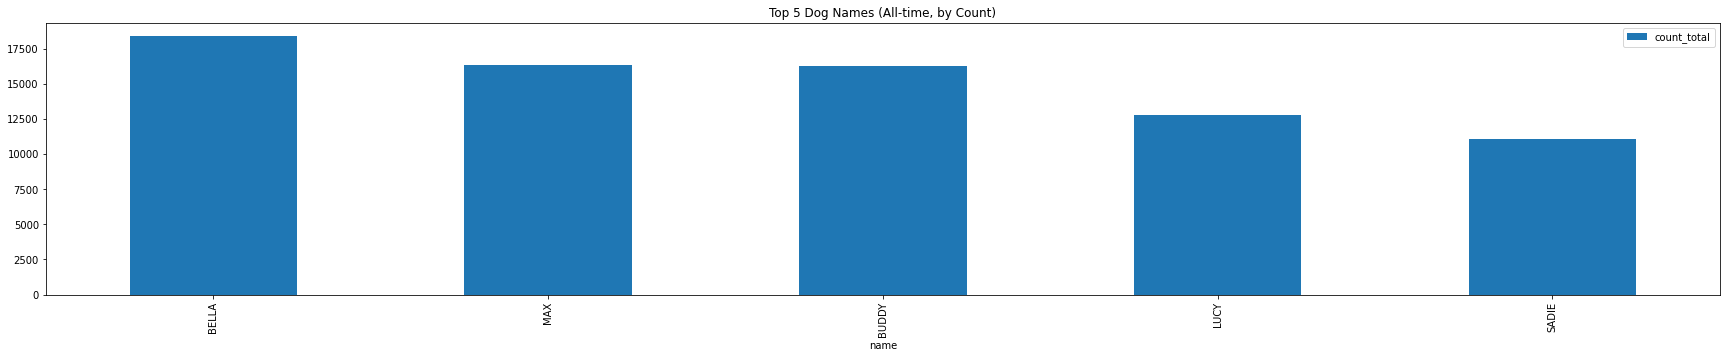

In [ ]:
n = 5
print('These are the',str(n),'most popular dog names overall:\n')
most_popular_count(dogs,n)

### **3.3 - What were the top n dog names in each location per year?**

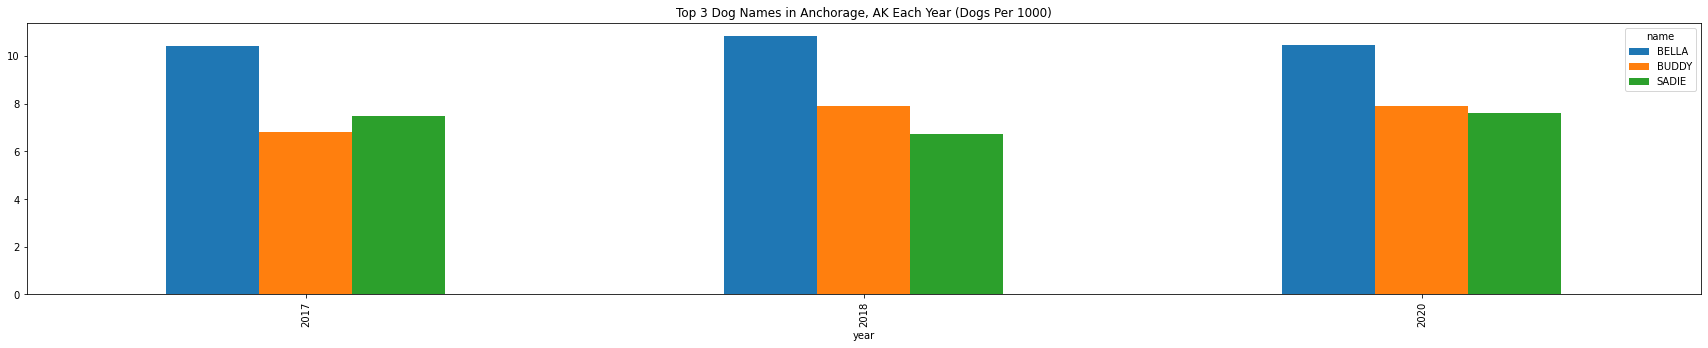

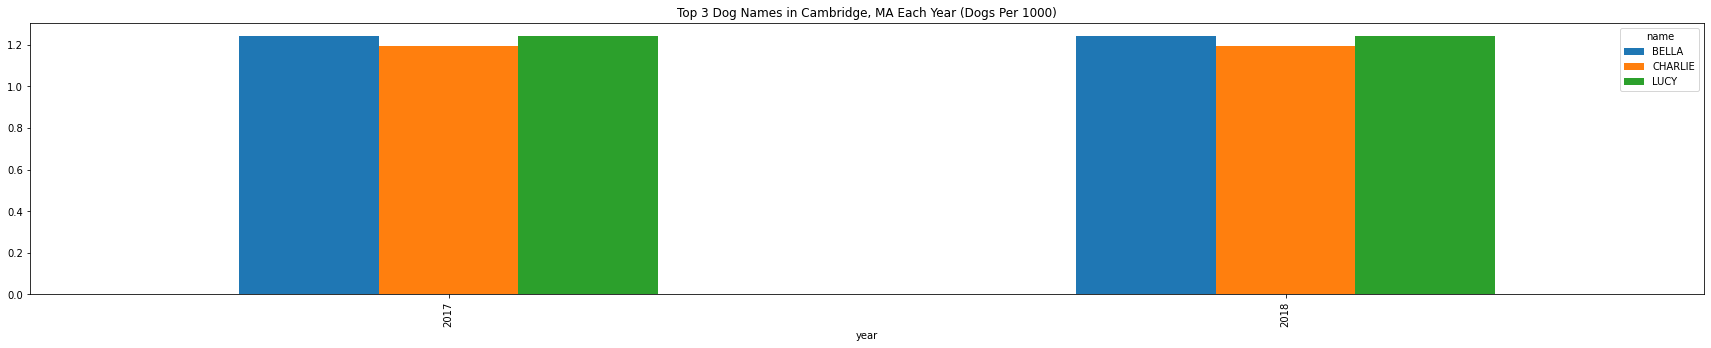

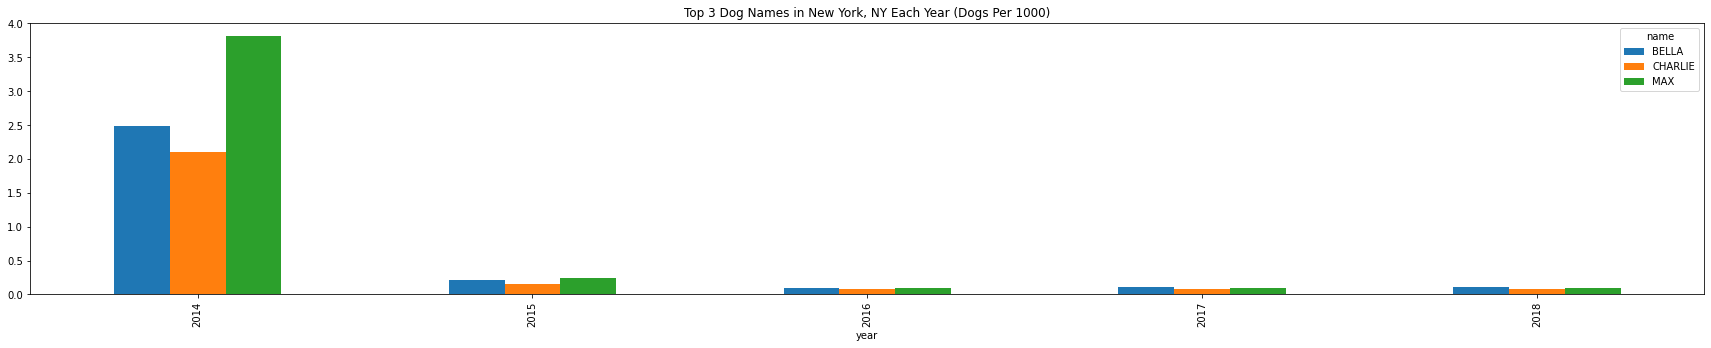

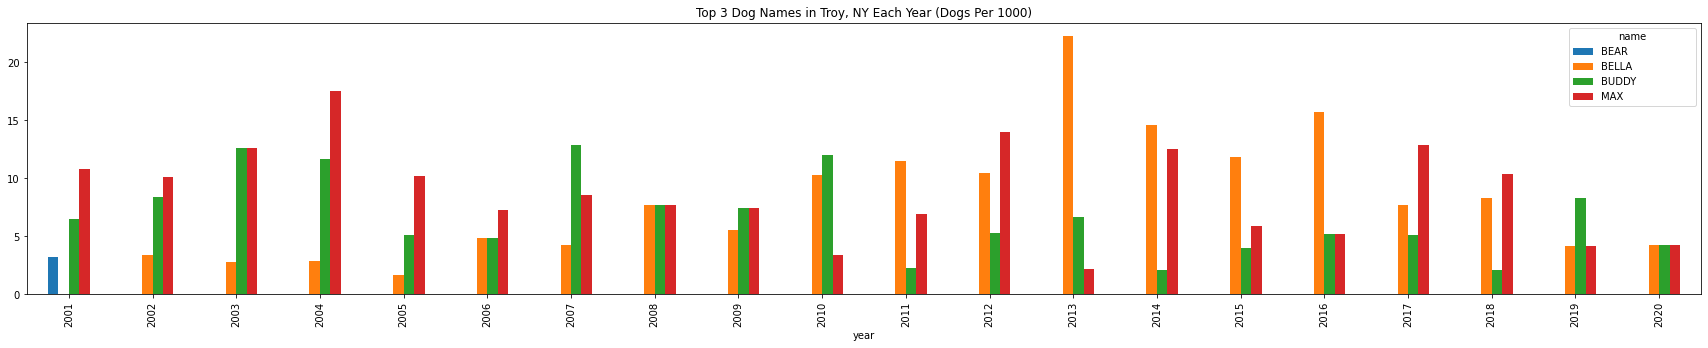

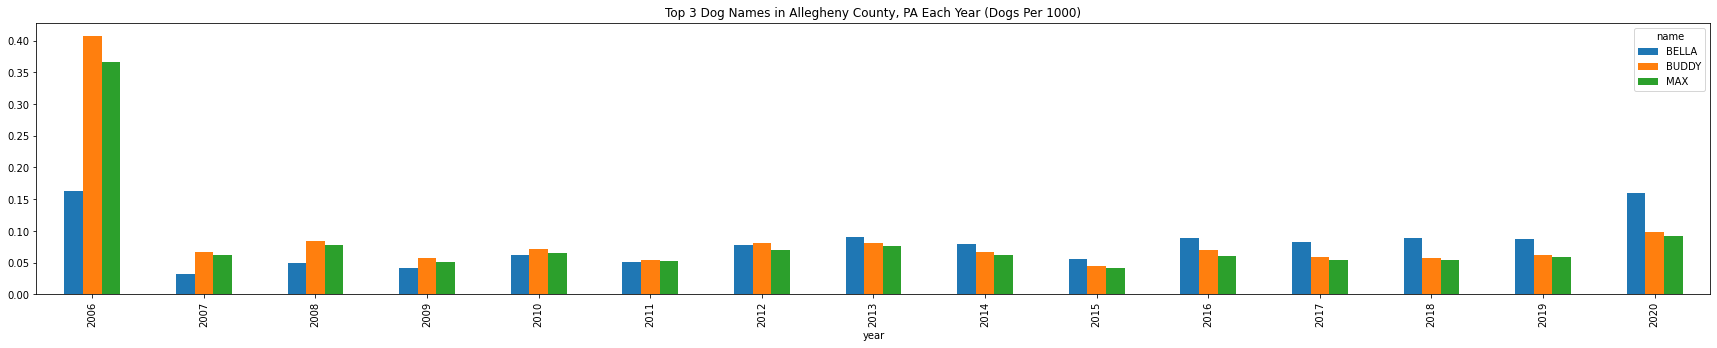

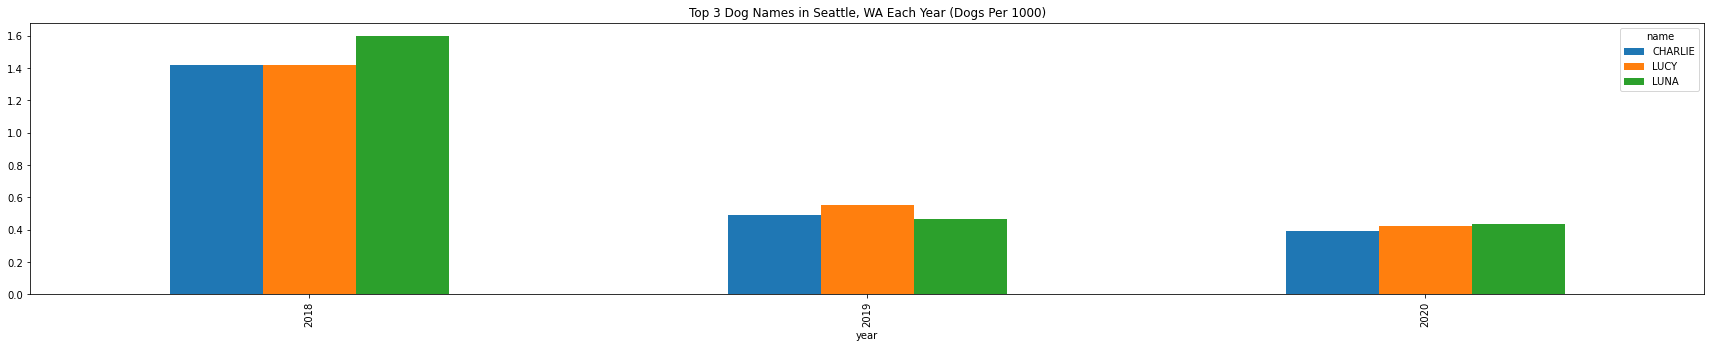

In [ ]:
n = 3

'''
topxcount(anchorage,n,"Anchorage, AK")
topxcount(cambridge,n,"Cambridge, MA")
topxcount(nyc,n,"New York, NY")
topxcount(troy,n,"Troy, NY")
topxcount(allegheny,n,"Allegheny County, PA")
topxcount(seattle,n,"Seattle, WA")
'''

topxper(anchorage,n,"Anchorage, AK")
topxper(cambridge,n,"Cambridge, MA")
topxper(nyc,n,"New York, NY")
topxper(troy,n,"Troy, NY")
topxper(allegheny,n,"Allegheny County, PA")
topxper(seattle,n,"Seattle, WA")

### **3.4 - How has the popularity of _____ changed over time?**

Enter a dog name to view it's popularity over time: nina


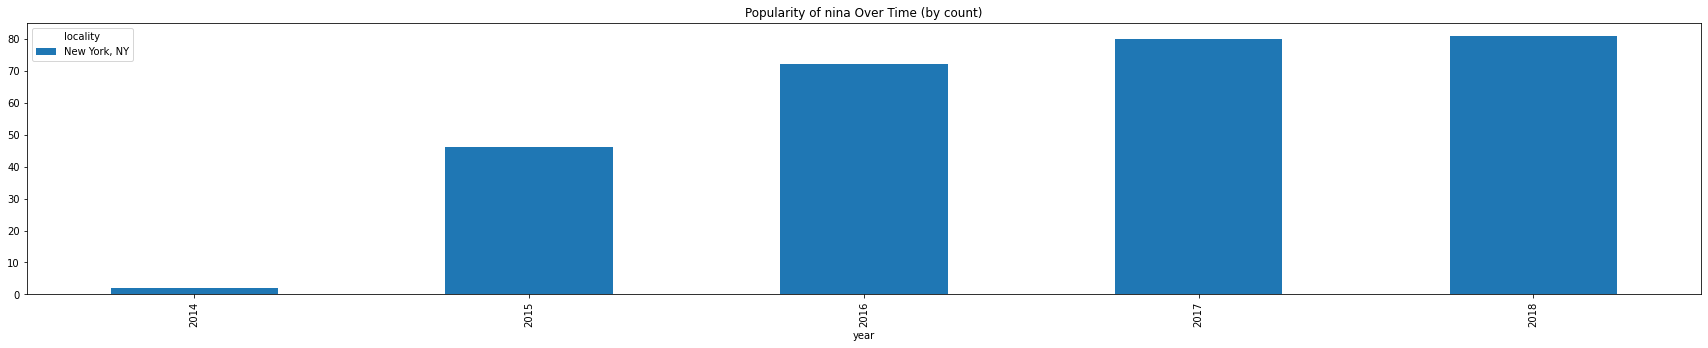

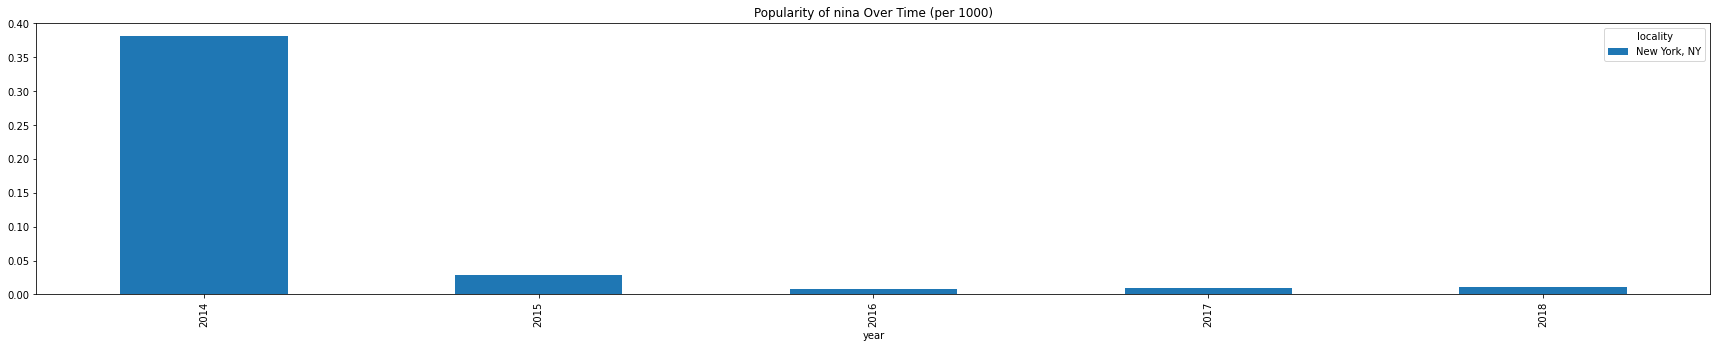

In [ ]:
dog = input("Enter a dog name to view it's popularity over time: ")

#change this value to view popularity in a specific locality
locality = nyc

name_popularity_count(locality,dog)
name_popularity_per(locality, dog)